## Transfer learning
- Use the weight parameters of other people's trained models as our initialization
- Generally, the fully connected layer needs to be trained by yourself. You can choose whether to train the feature extraction layer trained by others.

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### tensorflow.keras.applications


In [3]:
### Import model
from tf.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
pre_trained_model = ResNet101(input_shape = (75, 75, 3), 
                                include_top = False,
                                weights = 'imagenet')

Can choose which layers to train

In [5]:
for layer in pre_trained_model.layers:
    layer.trainable = False

### The function of callback

- Equivalent to a monitor, you can set some custom items during the training process, such as stopping early, changing the learning rate, etc.

callbacks = [

   If it has not decreased for two consecutive epochs, it will stop:
  
       tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  
   The learning rate can be changed dynamically:
  
       tf.keras.callbacks.LearningRateScheduler
      
   Save the model:
  
       tf.keras.callbacks.ModelCheckpoint
      
   Custom method:
  
       tf.keras.callbacks.Callback
]

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [7]:
from tensorflow.keras.optimizers import Adam

# Prepare for fully connected layer
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer, which requires re-training
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
# Output layer
x = layers.Dense(1, activation='sigmoid')(x)
# Build model sequence
model = Model(pre_trained_model.input, x)

model.compile(optimizer = Adam(lr=0.001),
               loss = 'binary_crossentropy',
               metrics = ['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (75, 75))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (75, 75))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Training model
- Added Callback() module

In [9]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/100
100/100 - 77s - loss: 0.7548 - acc: 0.5505 - val_loss: 1.3740 - val_acc: 0.5380
Epoch 2/100
100/100 - 77s - loss: 0.6978 - acc: 0.5555 - val_loss: 0.9346 - val_acc: 0.5490
Epoch 3/100
100/100 - 78s - loss: 0.6814 - acc: 0.5815 - val_loss: 0.7062 - val_acc: 0.6250
Epoch 4/100
100/100 - 79s - loss: 0.6597 - acc: 0.6105 - val_loss: 0.7544 - val_acc: 0.6090
Epoch 5/100
100/100 - 80s - loss: 0.6761 - acc: 0.5920 - val_loss: 0.8452 - val_acc: 0.6000
Epoch 6/100
100/100 - 79s - loss: 0.6509 - acc: 0.6195 - val_loss: 0.7476 - val_acc: 0.6310
Epoch 7/100
100/100 - 79s - loss: 0.6597 - acc: 0.6090 - val_loss: 0.7040 - val_acc: 0.6240
Epoch 8/100
100/100 - 79s - loss: 0.6569 - acc: 0.6100 - val_loss: 0.8864 - val_acc: 0.5940
Epoch 9/100
100/100 - 77s - loss: 0.6500 - acc: 0.6005 - val_loss: 0.9302 - val_acc: 0.5930
Epoch 10/100
100/100 - 77s - loss: 0.6595 - acc: 0.5985 - val_loss: 0.7211 - val_acc: 0.6360
Epoch 11/100
100/100 - 77s - loss: 0.6545 - acc: 0.6130 - val_loss: 0.7033 - va

Epoch 90/100
100/100 - 76s - loss: 0.6310 - acc: 0.6340 - val_loss: 0.6588 - val_acc: 0.6760
Epoch 91/100
100/100 - 76s - loss: 0.6166 - acc: 0.6660 - val_loss: 0.6695 - val_acc: 0.6740
Epoch 92/100
100/100 - 76s - loss: 0.6072 - acc: 0.6570 - val_loss: 0.6696 - val_acc: 0.6890
Epoch 93/100
100/100 - 76s - loss: 0.6074 - acc: 0.6675 - val_loss: 0.7144 - val_acc: 0.6920
Epoch 94/100
100/100 - 76s - loss: 0.6256 - acc: 0.6430 - val_loss: 0.6395 - val_acc: 0.6780
Epoch 95/100
100/100 - 76s - loss: 0.6280 - acc: 0.6550 - val_loss: 0.6525 - val_acc: 0.6740
Epoch 96/100
100/100 - 76s - loss: 0.6094 - acc: 0.6490 - val_loss: 0.6866 - val_acc: 0.6770
Epoch 97/100
100/100 - 76s - loss: 0.6264 - acc: 0.6540 - val_loss: 0.7169 - val_acc: 0.6630
Epoch 98/100
100/100 - 76s - loss: 0.6114 - acc: 0.6700 - val_loss: 0.6980 - val_acc: 0.6760
Epoch 99/100
100/100 - 76s - loss: 0.6138 - acc: 0.6655 - val_loss: 0.6570 - val_acc: 0.6900
Epoch 100/100
100/100 - 76s - loss: 0.5993 - acc: 0.6735 - val_loss: 0

Graph demonstration

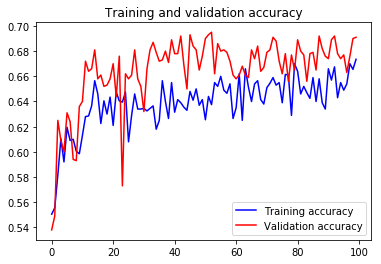

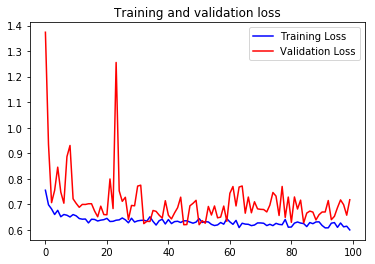

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### You can also choose the layer you need, that is, which layer to get.

- last_layer = pre_trained_model.get_layer('name of layer')